# Proyek Analisis Data: Bike Sharing Dataset (Day)
- **Nama:** Prisca Della Budiman
- **Email:** m200d4kx1504@bangkit.academy
- **ID Dicoding:** prisca101

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingkan permintaan rental sepeda berdasarkan tipe user, yakni casual atau registered?
- Bagaimana keadaan cuaca mempengaruhi rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Analisis


---

Tahapan ini digunakan untuk melihat isi dari dataset. Dapat diketahui dataset ini 16 kolom atau atribut dengan value dan tipe data yang berbeda-beda.

### Assessing Data

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Analisis

---

Tidak terdapat keanehan pada dataset seperti duplikasi ataupun missing values. Hanya saja perlu mengubah tipe data object pada kolom dteday (atribut date) menjadi tipe data date.

### Cleaning Data

In [8]:
bike_df["dteday"] = pd.to_datetime(bike_df["dteday"])

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Analisis

---

Terlihat bahwa kolom dteday berhasil diubah tipe datanya menjadi date.

## Exploratory Data Analysis (EDA)

### Bagaimana perbandingkan permintaan rental sepeda berdasarkan tipe user, yakni casual atau registered?

In [9]:
print("Total casual users:", bike_df['casual'].sum())
print("Total registered users:", bike_df['registered'].sum())

Total casual users: 620017
Total registered users: 2672662


Analisis

---

Tampak bahwa jumlah registered users jauh lebih banyak dibandingkan casual users, yakni berselisih 2.052.645 user

In [10]:
bike_df.groupby(by="weekday").agg({
    "casual" : "sum",
    "registered" : "sum",
})

,casual,registered
weekday,,
0,140521,303506
1,70784,384719
2,57843,411266
3,57319,415729
4,61460,423935
5,78238,409552
6,153852,323955


Analisis

---

Berdasarkan tabel diatas, diketahui casual users paling banyak rent sepeda pada weekday 6 atau pada Hari Sabtu, sedangkan registered users di weekday 4 atau Hari Kamis.

In [11]:
bike_df.groupby(by="workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
})

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


Analisis


---

Namun jika dilihat dari atribut workingday yang menunjukkan hari tersebut adalah hari kerja ataupun bukan, maka didapatkan casual users lebih sering rent bike di hari libur (Sabtu, Minggu, hari raya, holidays) dan registered users sering rent bike di hari kerja (Senin sampai Jumat).

In [12]:
bike_df.groupby(by="yr").agg({
    "casual" : ["sum", "min", "max"],
    "registered" : ["sum", "min", "max"],
})

casual           registered           
       sum min   max        sum  min   max
yr                                        
0   247252   9  3065     995851  416  4614
1   372765   2  3410    1676811   20  6946

Analisis

---

Untuk semua tipe users, keduanya paling sering rent bike di tahun kedua, yakni 2012. Ini dapat menggambarkan bahwa kegiatan program bike sharing ini menaik atau bertambah sukses.

In [13]:
bike_df.groupby(["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
yr mnth                    
0  1       3073       35116
   2       6242       41973
   3      12826       51219
   4      22346       72524
   5      31050      104771
   6      30612      112900
   7      36452      104889
   8      28842      107849
   9      26545      100873
   10     25222       98289
   11     15594       86573
   12      8448       78875
1  1       8969       87775
   2       8721       94416
   3      31618      133257
   4      38456      135768
   5      44235      151630
   6      43294      159536
   7      41705      161902
   8      43197      171306
   9      43778      174795
   10     34538      164303
   11     21009      131655
   12     13245      110468

Analisis

---

Di tahun 2011, terlihat bahwa rent bikes paling sedikit adalah bulan pertama atau Januari, baik untuk casual users maupun registered users. Rent bikes tertinggi untuk casual users adalah Bulan Juli. Untuk registered users adalah Bulan Juni. Kedua tipe user menurun di Bulan Agustus.
<br>
Sedangkan pada tahun 2012, rent bikes casual users terkecil ada di Bulan Februari, dan registered users di Bulan Januari. Berpuncak lagi di Bulan Mei untuk casual users dan Bulan September untuk registered users.
<br>
Selain itu, range daripada total users untuk casual users awal dengan akhir adalah 10.172. Sedangkan registered users memiliki selisih yang jauh lebih besar, yakni 75.352.

In [14]:
bike_df.groupby(by="season").agg({
    "casual" : ["sum", "min", "max"],
    "registered" : ["sum", "min", "max"],
})

casual            registered           
           sum  min   max        sum  min   max
season                                         
1        60622    9  3155     410726  416  5315
2       203522  120  3410     715067  674  6456
3       226091  118  3160     835038  889  6917
4       129782    2  3031     711831   20  6946

Analisis

---

Kedua tipe users paling sering rent bike di musim ketiga, yakni Fall Season atau Musim Gugur kemudian Summer Season.

In [15]:
bike_df.groupby(by="holiday").agg({
    "casual" : ["sum", "min", "max"],
    "registered" : ["sum", "min", "max"],
})

casual            registered           
            sum  min   max        sum  min   max
holiday                                         
0        597658    2  3410    2616586   20  6946
1         22359  117  3065      56076  573  5172

Analisis

---

Kedua tipe user paling sering rent bike bukan di saat waktu holiday.

### Bagaimana keadaan cuaca mempengaruhi rental sepeda?

In [16]:
bike_df[['season', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe(include='all')

,season,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


Analisis

---

1. Kolom temp atau normalized temperature memiliki rentang minimal 0.059 sampai maksimum 0.862. Maka dapat disimpulkan bahwa cool temperature adalah value yang mendekati 0.059. Warm temperature mendekati 0.862. Moderate temperature mendekati diantaranya.
2. Kolom atemp atau normalized feeling temperature memiliki rentang minimal 0.079 dan maksimal 0.841. Sehingga cool temperature adalah value yang mendekati 0.079. Warm temperature mendekati 0.841. Moderate temperature mendekati diantaranya.
3. Kolom cnt atau total rental bikes per harinya minimum 22 sepeda hingga 8714 sepeda.

In [17]:
def cal_range(min, max):
    range_val = max - min
    quarter_range = range_val / 3
    first_q = min + quarter_range
    second_q = first_q + quarter_range
    return first_q, second_q

# temp attribute
min_temp = 0.059
max_temp = 0.862

first_q_temp, second_q_temp = cal_range(min_temp, max_temp)

# atemp attribute
min_atemp = 0.079
max_atemp = 0.841

first_q_atemp, second_q_atemp = cal_range(min_atemp, max_atemp)

bike_df["tempsit"] = bike_df.temp.apply(lambda x: "cool" if (x >= min_temp and x <= first_q_temp) else ("warm" if (x > second_q_temp and x <= max_temp) else "moderate"))
bike_df["atempsit"] = bike_df.atemp.apply(lambda x: "cool" if (x >= min_atemp and x <= first_q_atemp) else ("warm" if (x > second_q_atemp and x <= max_atemp) else "moderate"))

temp_grouped = bike_df.groupby(by="tempsit").cnt.sum().sort_values(ascending=False)
atemp_grouped = bike_df.groupby(by="atempsit").cnt.sum().sort_values(ascending=False)

print(temp_grouped, "\n")
print(atemp_grouped)


tempsit
warm        1490045
moderate    1365903
cool         436731
Name: cnt, dtype: int64 

atempsit
moderate    1580481
warm        1248980
cool         463218
Name: cnt, dtype: int64


Analisis

---

Setelah dilakukan pengelompokkan temperature dengan "cool", "moderate", kemudian "warm", dapat terlihat bahwa rental sepeda paling banyak digunakan di kondisi temperature warm (temperature ruangan) atau moderate (temperature tubuh), sedangkan paling sedikit justru di temperature cool.

In [18]:
def cal_range(min, max):
    range_val = max - min
    quarter_range = range_val / 3
    first_q = min + quarter_range
    second_q = first_q + quarter_range
    return first_q, second_q

# hum attribute
min_hum = 0.0000
max_hum = 0.9725

first_q_hum, second_q_hum = cal_range(min_hum, max_hum)

bike_df["humsit"] = bike_df.hum.apply(lambda x: "low" if (x >= min_hum and x <= first_q_hum) else ("high" if (x > second_q_hum and x <= max_hum) else "moderate"))

hum_grouped = bike_df.groupby(by="humsit").cnt.sum().sort_values(ascending=False)

print(hum_grouped)

humsit
moderate    1844674
high        1406870
low           41135
Name: cnt, dtype: int64


Analisis

---

Setelah dilakukan pengelompokkan humidity dengan "low", "moderate", kemudian "high", dapat terlihat bahwa rental sepeda paling banyak digunakan di kondisi humidity yang moderate, sedangkan paling sedikit di humidity low.

In [19]:
def cal_range(min, max):
    range_val = max - min
    quarter_range = range_val / 3
    first_q = min + quarter_range
    second_q = first_q + quarter_range
    return first_q, second_q

# wind attribute
min_wind = 0.022
max_wind = 0.507

first_q_wind, second_q_wind = cal_range(min_wind, max_wind)

bike_df["windsit"] = bike_df.windspeed.apply(lambda x: "low" if (x >= min_wind and x <= first_q_wind) else ("high" if (x > second_q_wind and x <= max_wind) else "moderate"))

wind_grouped = bike_df.groupby(by="windsit").cnt.sum().sort_values(ascending=False)

print(wind_grouped)

windsit
low         1859817
moderate    1330494
high         102368
Name: cnt, dtype: int64


Analisis

---

Setelah dilakukan pengelompokkan windspeed dengan "low", "moderate", kemudian "high", dapat terlihat bahwa rental sepeda paling banyak digunakan di kondisi windspeed low, sedangkan paling sedikit di windspeed high.

In [20]:
bike_df.groupby(by="season").cnt.sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

Analisis

---

Terlihat bahwa rental bikes paling laku di musim keempat atau di Fall Season kemudian Summer Season.

In [21]:
bike_df.groupby(by=["season", "weathersit"])["cnt"].sum().sort_values(ascending=False)

season  weathersit
3       1             799443
2       1             626986
4       1             519487
1       1             312036
4       2             302510
2       2             288096
3       2             250679
1       2             155573
4       3              19616
3       3              11007
1       3               3739
2       3               3507
Name: cnt, dtype: int64

Analisis

---

Terlihat bahwa kondisi cuaca memengaruhi banyaknya rental bikes lebih dari musim itu sendiri. Cuaca yang paling menentukan adalah weathersit 1 dimana kondisi langit Clear, Few clouds, atau Partly cloudy. Rent bike paling laku di clear weather situation dan di Fall Season, kemudian di Summer Season. Dan untuk weather situation 2 dimana kondisi cuaca Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, ataupun Mist, rent bikes paling banyak diminati di Winter Season. Sedangkan user paling jarang rent bike di Summer Season saat weather conditionnya adalah Light Snow, Light Rain + Thunderstorm + Scattered clouds, atau Light Rain + Scattered clouds.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingkan permintaan rental sepeda berdasarkan tipe user, yakni casual atau registered?

<ipython-input-22-b479bdcc04ca>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


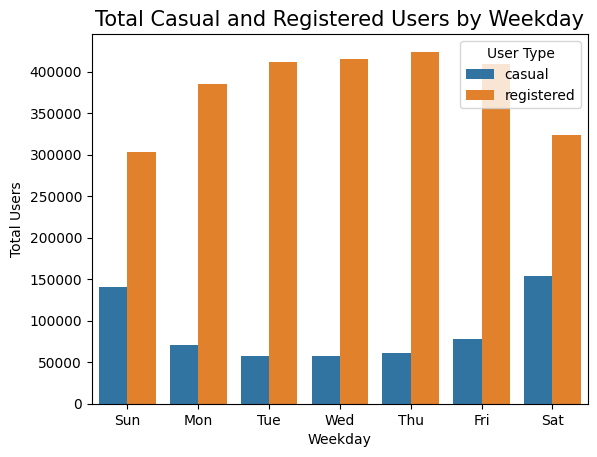

In [22]:
weekday_totals = bike_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

weekday_df = pd.melt(weekday_totals, id_vars=['weekday'], var_name='User Type', value_name='Sum')

ax = sns.barplot(data=weekday_df, x='weekday', y='Sum', hue='User Type')
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Weekday')
plt.ylabel('Total Users')
plt.title('Total Casual and Registered Users by Weekday', loc="center", fontsize=15)
plt.legend(title='User Type')

# Show plot
plt.show()


Analisis

---

Berdasarkan visualisasi data tersebut, terlihat bahwa casual users dengan registered users cukup berbanding terbalik. Hari-hari terlaris rental bikes oleh registered users justru merupakan hari yang paling tidak diminati oleh casual users, seperti pada weekday ketiga keempat, atau Hari Rabu dan Kamis. Casual users paling banyak menggunakan rental bikes di Hari Sabtu sedangkan registered users di Hari Kamis. Casual users paling jarang menggunakan rental bikes di Hari Rabu sedangkan registered users di Hari Minggu.

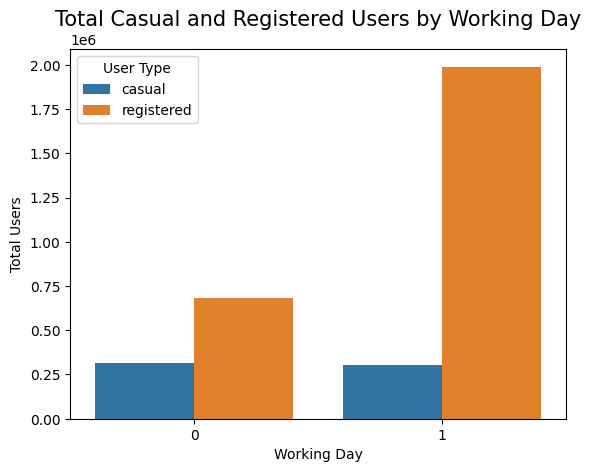

In [23]:
workingday_totals = bike_df.groupby("workingday").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

workingday_df = pd.melt(workingday_totals, id_vars=['workingday'], var_name='User Type', value_name='Sum')

# Plotting the clustered bar chart
sns.barplot(data=workingday_df, x='workingday', y='Sum', hue='User Type')
plt.xlabel('Working Day')
plt.ylabel('Total Users')
plt.title('Total Casual and Registered Users by Working Day', loc="center", fontsize=15)
plt.legend(title='User Type')

# Show plot
plt.show()

Analisis

---

Berdasarkan visualisasi data di atas, terlihat bahwa tidak terdapat perbedaan yang signifikan bagi casual users jika jika hari merekan rent bike merupakan hari kerja atau bukan. Sedangkan terdapat perbedaan signifikan bagi registered users, yakni rent bikes jauh lebih banyak digunakan di hari kerja (bukan weekend atau holidays). Hal tersebut mungkin dikarenakan rutinitas keseharian registered users yang sudah rent bikes di hari kerja, dan hari kerja tentunya cenderung lebih banyak dibandingkan hari libur atau holidays.

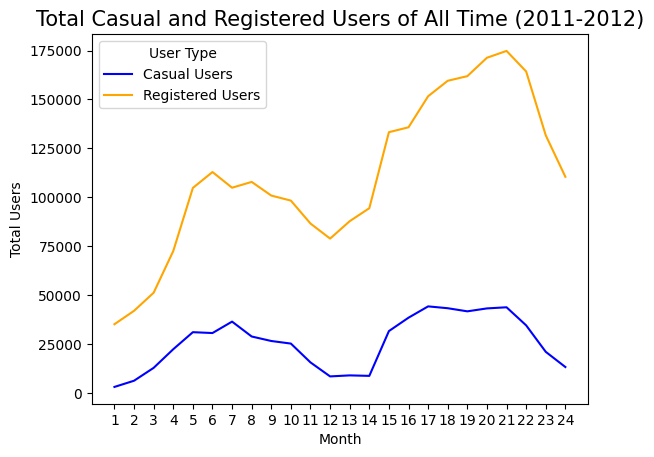

In [24]:
year_month_totals = bike_df.groupby(["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

plt.plot(year_month_totals['yr'] * 12 + year_month_totals['mnth'], year_month_totals['casual'], label='Casual Users', color='blue')
plt.plot(year_month_totals['yr'] * 12 + year_month_totals['mnth'], year_month_totals['registered'], label='Registered Users', color='orange')

plt.xlabel('Month')
plt.ylabel('Total Users')
plt.title('Total Casual and Registered Users of All Time (2011-2012)', fontsize=15)
plt.legend(title='User Type')

plt.xticks(range(1,25))

plt.show()

Analisis

---

Berdasarkan hasil plot visualisasi di atas, terlihat bahwa total casual dan registered users bike rental selama 2 tahun adalah selaras atau mirip, dengan perbedaan jauh pada bagian total users. Keduanya paling sedikit di Bulan Januari 2011, naik daun sampai Mei 2011, turun di Bulan September 2012 hingga terakhir Bulan Desember 2012. Tentunya, registered users atau users yang memiliki total anggota lebih banyak mengalami perubahan chart yang jauh lebih drastis dibandingkan casual users. Perbedaan lainnya adalah Bulan Juni-Juli 2011 dimana registered users masih turun daun total users-nya sedangkan casual users justru bertambah. Contoh lainnya adalah pada rentang atau range jumlah pengguna registered users yang awal dengan yang akhir memiliki selisih cukup tinggi, sehingga dapat mendukung bahwa rental bikes ini bertambah peminat atau sukses. Dibandingkan dengan casual users yang tidak banyak terdapat perubahan, atau berstatus menetap.

<ipython-input-25-7852d0013f3c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])


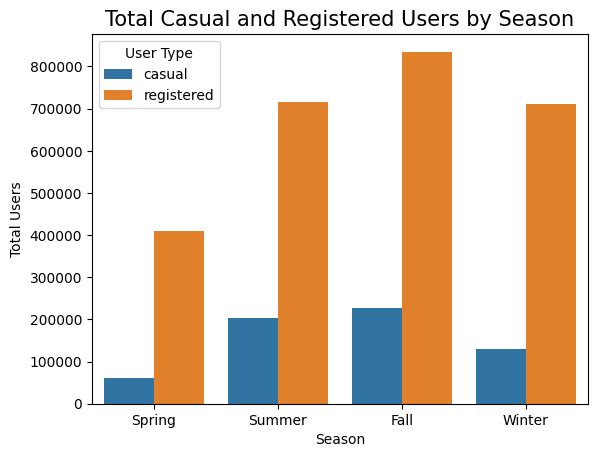

In [25]:
season_totals = bike_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

season_df = pd.melt(season_totals, id_vars=['season'], var_name='User Type', value_name='Total Count')

ax = sns.barplot(data=season_df, x='season', y='Total Count', hue='User Type')
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.title('Total Casual and Registered Users by Season', loc="center", fontsize=15)
plt.legend(title='User Type')

plt.show()

Dari grafik di atas, dapat disimpulkan bahwa casual users dan registered users memiliki pola rent bikes hampir sama untuk musimnya, yang jauh membedakan adalah banyak jumlah users. Kedua tipe user paling sedikit rent bikes di Spring Season, dan paling banyak di Fall Season.

### Pertanyaan 2: Bagaimana keadaan cuaca mempengaruhi rental sepeda?

<ipython-input-26-ae9a627cf493>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temp_df, x='tempsit', y='cnt', order=['cool', 'moderate', 'warm'], palette=colors_temp)
<ipython-input-26-ae9a627cf493>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=atemp_df, x='atempsit', y='cnt', order=['cool', 'moderate', 'warm'], palette=colors_atemp)


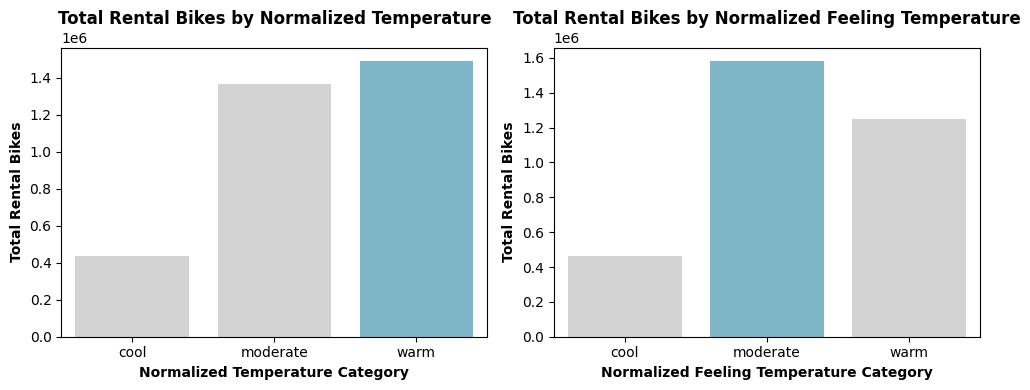

In [26]:
# temp
temp_df = temp_grouped.to_frame().reset_index()

colors_temp = ["#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data=temp_df, x='tempsit', y='cnt', order=['cool', 'moderate', 'warm'], palette=colors_temp)
plt.xlabel('Normalized Temperature Category', fontweight="bold")
plt.ylabel('Total Rental Bikes', fontweight="bold")
plt.title('Total Rental Bikes by Normalized Temperature', fontweight="bold")

# atemp
atemp_df = atemp_grouped.to_frame().reset_index()

colors_atemp = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.subplot(1, 2, 2)
sns.barplot(data=atemp_df, x='atempsit', y='cnt', order=['cool', 'moderate', 'warm'], palette=colors_atemp)
plt.xlabel('Normalized Feeling Temperature Category', fontweight="bold")
plt.ylabel('Total Rental Bikes', fontweight="bold")
plt.title('Total Rental Bikes by Normalized Feeling Temperature', fontweight="bold")

plt.tight_layout()
plt.show()


Analisis

---

Berdasarkan hasil visualisasi kedua grafik di atas, terlihat bahwa rental bikes secara keseluruhan paling banyak digunakan di saat temperature moderate atau sesuai dengan perasaan kondisi tubuh, atau yang sesungguhnya merupakan temperature warm di ruangan. Rental bikes jauh atau jarang digunakan di temperature cool.

<ipython-input-27-85b4c0319750>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hum_df, x='humsit', y='cnt', order=['low', 'moderate', 'high'], palette=colors)


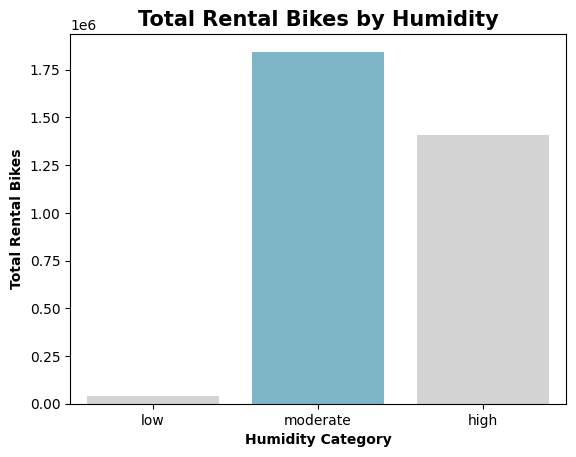

In [27]:
hum_df = hum_grouped.to_frame().reset_index()

colors = ["#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(data=hum_df, x='humsit', y='cnt', order=['low', 'moderate', 'high'], palette=colors)
plt.xlabel('Humidity Category', fontweight="bold")
plt.ylabel('Total Rental Bikes', fontweight="bold")
plt.title('Total Rental Bikes by Humidity', fontsize=15, fontweight="bold")

plt.show()

Analisis

---

Berdasarkan hasil visualisasi di atas, rental bike paling sering diminati user pada kondisi humidity yang moderate, dan jarang sekali saat low humidity. Ini sesuai dikarenakan humidity yang rendah menimbulkan kurangnya uap air sehingga udara menjadi lebih panas dan kering, menjadikannya kondisi cuaca yang kurang cocok untuk bersepeda.

<ipython-input-28-a4a75c6fcbdd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])


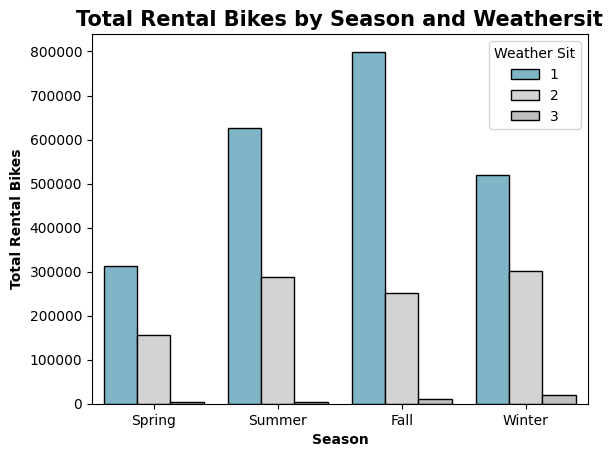

In [28]:
season_df = bike_df.groupby(by=["season", "weathersit"])["cnt"].sum().to_frame()

colors = ["#72BCD4", "#D3D3D3", "#BFBFBF"]

ax = sns.barplot(data=season_df, x='season', y='cnt', hue='weathersit', palette=colors, edgecolor='black')
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Season', fontweight="bold")
plt.ylabel('Total Rental Bikes', fontweight="bold")
plt.title('Total Rental Bikes by Season and Weathersit', fontsize=15, fontweight="bold")
plt.legend(title='Weather Sit')
plt.show()


Analisis

---

Berdasarkan hasil grafik visualisasi tersebut, terlihat bahwa rental bikes bagi user tidak mementingkan musim itu sendiri, melainkan kondisi cuaca. User paling berminat rent bikes di weathersit 1, yakni Clear, Few clouds, atau Partly cloudy, jauh berbeda dengan kondisi cuaca lainnya. Sedangkan kondisi cuaca kedua membuat rental bikes cukup stabil, yakni saat cuaca Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, atau hanya Mist. Jarang user menggunakan rental bikes di kondisi cuaca ketiga disebabkan ia Light Snow, Light Rain + Thunderstorm + Scattered clouds, atau Light Rain + Scattered clouds. Walaupun di musim kurang sesuai (misalkan musim dingin atau musim panas), jika cuaca mendukung, user akan tetap menggunakan rental bikes.

## Conclusion

- Bagaimana perbandingkan permintaan rental sepeda berdasarkan tipe user, yakni casual atau registered?<br>
Salah satu perbandingan yang tampak jelas antara casual dengan registered user adalah pada waktu keduanya rental sepeda. Casual users dengan registered users berbanding terbalik mengenai hari mereka rental sepeda. Seperti Hari Sabtu dan Minggu merupakan hari paling banyak untuk casual users, sedangkan hari kerja (Senin-Jumat) adalah yang paling banyak untuk registered users, dan begitu pula sebaliknya. Hari kerja tidak mempengaruhi casual users untuk rental sepeda, sebab mereka melakukannya secara spontan, baik itu hari kerja maupun libur, menyebabkan jumlah total rental bikes antara hari kerja dengan holidays mirip, walaupun jumlah hari kerja jauh lebih banyak daripada hari libur. Sedangkan registered users menggunakan rental sepeda sebagai rutinitas sehingga selisih antara kedua tipe hari tersebut tinggi. Selain itu, progress total rental bikes selama 2 tahun menunjukkan grafik yang cukup mirip antara casual dengan registered users, baik waktu naik dan turun daun. Hanya saja registered users merental sepeda jauh lebih banyak dibandingkan casual users. Selisih total rental sepeda awal dengan akhir menunjukkan perkembangan yang besar bagi registered users, sedangkan perkembangan casual users sangat sedikit jika dibandingkan.

---


- Bagaimana keadaan cuaca mempengaruhi rental sepeda? <br>
Keadaan cuaca mempengaruhi total rental sepeda. Kebanyakan orang menggunakan rental sepeda jika keadaan cuaca sedang mendukung. Seperti pada normalized temperature warm ataupun normalized feeling temperature moderate, dan rental bikes akan menurun drastis di kondisi temperature cool. Humidity juga berpengaruh, yakni rental sepeda banyak digunakan di kondisi moderate, sedangkan jarang di kondisi low. Begitu pula hal nya dengan windspeed. Season atau musim tidak terlalu diperhatikan oleh para pengguna rental sepeda, melainkan mereka lebih melihat kondisi weather hari tersebut, yakni paling banyak dalam cuaca cerah maupun cloudy, jauh drastis dengan cuaca hujan atau salju.